**Task 4:**

Based on Task-3, ParTech now wants to use the model to identify the most unengaged users and implement some business actions to convert them to engaged users. To enable this, Data Scientists need to help set up an experiment to prove that the model works through the following sub-tasks.

In [ ]:
from google.colab import drive 
#get drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
from sklearn import metrics

In [ ]:
df_all=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/complete_dataset.csv')
df_task4=pd.read_csv('/content/drive/My Drive/Data_Science/All Modules/11 Industry Grade Project/Industry_Project_2/1028_Industry Project 2_Datasets/task3_dataset.csv')

***Sub-tasks - Part A - [Model Scoring using Jupyter Notebook | Python3]***
1. Use the model developed in Task 3 to score on 201901 data

In [ ]:
eng =  ((df_all['yearmonth']==201809) | (df_all['yearmonth']==201808) | (df_all['yearmonth']==201807) | (df_all['yearmonth']==201806) | (df_all['yearmonth']==201805) | (df_all['yearmonth']==201804) | (df_all['yearmonth']==201803) | (df_all['yearmonth']==201802) | (df_all['yearmonth']==201801))
df1 = df_all[eng]
X1=df1[['yearmonth','attributes_notifications_marketing_email','attributes_notifications_marketing_push','num_contacts','amount_usd','direction_outbound','direction_inbound','transactions_state_completed','transactions_state_reverted','transactions_state_declined','transactions_state_pending','transactions_state_failed','transactions_state_cancelled','transactions_type_transfer','transactions_type_card_payment','transactions_type_exchange','transactions_type_atm','transactions_type_topup','transactions_type_card_refund','transactions_type_refund','transactions_type_fee','transactions_type_cashback','transactions_type_tax','tx_count','engaged_days']]
y1=df1['unengaged_customer']
X_score3=df_task4[['yearmonth','attributes_notifications_marketing_email','attributes_notifications_marketing_push','num_contacts','amount_usd','direction_outbound','direction_inbound','transactions_state_completed','transactions_state_reverted','transactions_state_declined','transactions_state_pending','transactions_state_failed','transactions_state_cancelled','transactions_type_transfer','transactions_type_card_payment','transactions_type_exchange','transactions_type_atm','transactions_type_topup','transactions_type_card_refund','transactions_type_refund','transactions_type_fee','transactions_type_cashback','transactions_type_tax','tx_count','engaged_days']]
y_score3=df_task4['unengaged_customer']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.20,random_state=5) 

In [ ]:
xgb_model = XGBClassifier(max_depth=50, n_estimators=80)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_predict = xgb_model.predict(X_test)
xgb_accuracy = metrics.accuracy_score(xgb_predict, y_test)
print ("XGBoost > Accuracy (validation1 data): ", xgb_accuracy)


XGBoost > Accuracy (validation1 data):  0.9945965070277573


In [ ]:
xgb_predict3 = xgb_model.predict(X_score3)
xgb_predict3=xgb_predict3.tolist()
xgb_accuracy3 = metrics.accuracy_score(xgb_predict3, y_score3)
print ("XGBoost > Accuracy (score data): ", xgb_accuracy3)
df_task4['xgb_unengaged_customer']=xgb_predict3

XGBoost > Accuracy (score data):  0.8638761429480524


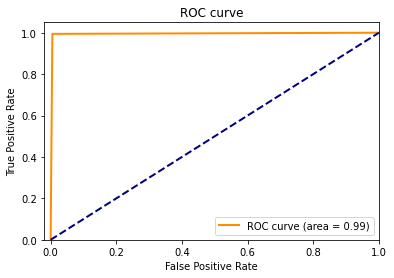

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, xgb_predict)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

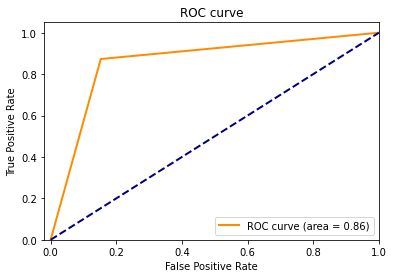

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_score3.values, xgb_predict3)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

From the ROC-AUC curve we can conclude that the XGBoost model is providing 86% accuracy.

In [ ]:
eng = df_all['unengaged_customer']==0
df1 = df_all[eng]

<BarContainer object of 25 artists>

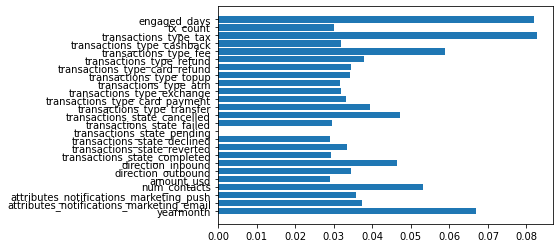

In [ ]:
xgb_model.feature_importances_
plt.barh(X_train.columns, xgb_model.feature_importances_)

From the feature importance graph we can conclude that the feature that affects the unengaged customer metric most is engaged days.

***Sub-tasks - Part B - [Experiment setup using Jupyter Notebook | Python3]***
1. Set up test and control groups (60%-40%) from the top 10% unengaged customers. Note: In real-life business scenarios, testing is not usually done on full base but on a smaller set of customers for whom it will be most effective
2. Perform an appropriate statistical test to test customer characteristics and check if control groups are similar

In [ ]:
df_sample, _ = np.split(df1, [int(.1*len(df1.index))])

In [ ]:
alpha = 0.05
test_group = df_sample.sample(frac=0.6)
control_group = df_sample.drop(test_group.index)
mu = test_group['engaged_days'].mean()
sys_bp=test_group['engaged_days'].values.tolist()
print(sys_bp)

[408, 479, 420, 422, 419, 77, 431, 433, 417, 427, 426, 363, 422, 413, 403, 307, 430, 423, 383, 420, 426, 473, 423, 428, 414, 430, 414, 435, 429, 420, 428, 420, 346, 427, 419, 423, 422, 427, 345, 424, 432, 423, 433, 389, 432, 0, 97, 422, 395, 234, 341, 410, 261, 395, 423, 396, 409, 435, 424, 418, 409, 431, 334, 402, 415, 472, 430, 422, 433, 427, 413, 413, 360, 410, 363, 481, 426, 463, 408, 423, 350, 392, 423, 423, 428, 413, 409, 434, 425, 477, 329, 381, 432, 421, 461, 412, 425, 420, 407, 426, 433, 404, 413, 386, 473, 412, 422, 406, 433, 121, 433, 386, 426, 425, 416, 12, 425, 403, 410, 384, 402, 469, 119, 27, 413, 433, 410, 416, 430, 47, 488, 6, 285, 407, 272, 226, 403, 403, 408, 407, 407, 398, 372, 249, 473, 403, 422, 426, 392, 408, 420, 423, 422, 422, 435, 330, 416, 426, 420, 408, 402, 397, 408, 417, 355, 488, 418, 462, 483, 408, 283, 261, 474, 413, 477, 407, 426, 315, 413, 412, 435, 430, 412, 372, 428, 432, 428, 488, 409, 6, 389, 385, 244, 435, 479, 425, 430, 417, 435, 420, 423, 417, 

In [ ]:
t_value,p_value=stats.ttest_1samp(sys_bp,mu)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one tailed test is %f'%one_tailed_p_value)

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that there is no affect on unengaged customers after providing the offer. 

i.e., μ = 165 at %.2f level of significance'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.
          So we conclude that there is affect on unengaged customers after providing the offer. 

i.e., μ = 165 at %.2f level of significance'''%alpha)

Test statistic is 0.000000
p-value for one tailed test is 0.500000
Conclusion n Since p-value(=0.500000) > alpha(=0.05) We do not reject the null hypothesis H0.
          So we conclude that there is affect on unengaged customers after providing the offer. 

i.e., μ = 165 at 0.05 level of significance
